In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/NBA_2024_Shots.csv'
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA_2024_Shots.csv')

# Display the structure of the dataset to ensure it's loaded correctly
print(data.info())


Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218701 entries, 0 to 218700
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEASON_1        218701 non-null  int64  
 1   SEASON_2        218701 non-null  object 
 2   TEAM_ID         218701 non-null  int64  
 3   TEAM_NAME       218701 non-null  object 
 4   PLAYER_ID       218701 non-null  int64  
 5   PLAYER_NAME     218701 non-null  object 
 6   POSITION_GROUP  217437 non-null  object 
 7   POSITION        217437 non-null  object 
 8   GAME_DATE       218701 non-null  object 
 9   GAME_ID         218701 non-null  int64  
 10  HOME_TEAM       218701 non-null  object 
 11  AWAY_TEAM       218701 non-null  object 
 12  EVENT_TYPE      218701 non-null  object 
 13  SHOT_MADE       218701 non-null  bool   
 14  ACTION_TYPE     218701 non-null  object 
 15  SHOT_TYPE       218701 non-null  object 
 16  BASIC_ZONE      218701 non-nul

In [ ]:
# Select relevant features for clustering
features = data[['LOC_X', 'LOC_Y', 'SHOT_DISTANCE']]

# Standardize the features for clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
#We focus on spatial features (LOC_X, LOC_Y, SHOT_DISTANCE) and standardize them to ensure all features are treated equally in the clustering algorithm.

In [ ]:
from sklearn.cluster import KMeans

# Perform clustering on the entire dataset
kmeans = KMeans(n_clusters=3, random_state=42)
data.loc[:, 'CLUSTER'] = kmeans.fit_predict(features_scaled)
#We apply K-Means clustering to the entire dataset, grouping shots into 3 clusters. The cluster assignments are saved as a new column in the DataFrame.

In [ ]:
# Add position groupings if not already present
data['POSITION_GROUP'] = data['POSITION_GROUP'].fillna('Unknown')

# Group the data by position and cluster to calculate stats
position_cluster_stats = data.groupby(['POSITION_GROUP', 'CLUSTER']).agg(
    total_shots=('SHOT_MADE', 'size'),
    made_shots=('SHOT_MADE', 'sum'),
    made_percentage=('SHOT_MADE', 'mean'),
    avg_distance=('SHOT_DISTANCE', 'mean')
).reset_index()

# Rename columns for readability
position_cluster_stats.rename(columns={'made_percentage': 'made_shot_percentage'}, inplace=True)
#We group the data by POSITION_GROUP and CLUSTER to compute statistics for each position and cluster, such as total shots, made shots, shooting percentage, and average shot distance.

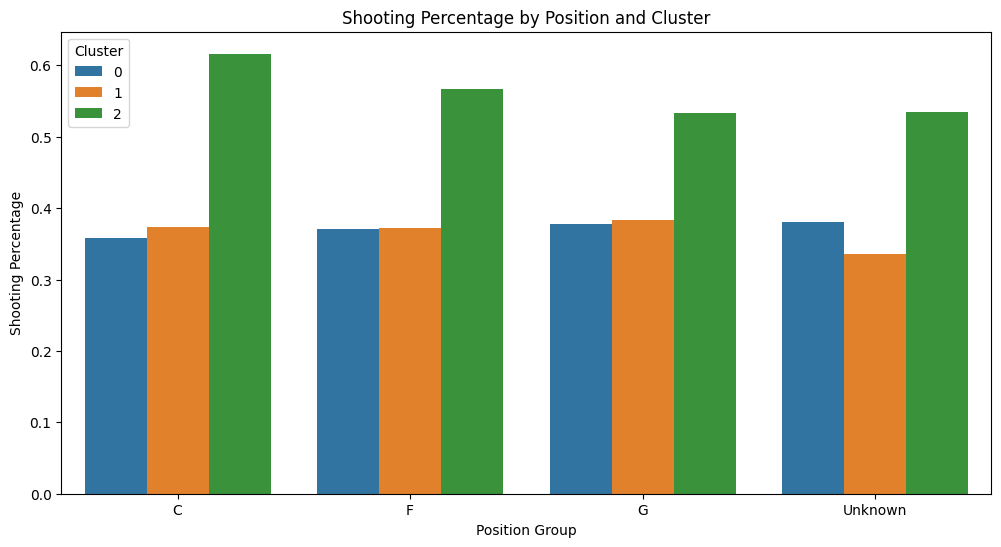

In [ ]:
# Visualize shooting percentages by position and cluster
plt.figure(figsize=(12, 6))
sns.barplot(
    data=position_cluster_stats,
    x='POSITION_GROUP',
    y='made_shot_percentage',
    hue='CLUSTER',
    palette='tab10'
)
plt.title('Shooting Percentage by Position and Cluster')
plt.xlabel('Position Group')
plt.ylabel('Shooting Percentage')
plt.legend(title='Cluster')
plt.show()


#This scatterplot visualizes the clusters for all players. The color indicates the cluster, and the marker style represents the player position group (e.g., Guards, Forwards, Centers).


<ipython-input-11-b149f6db43c1>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_stats = data.groupby(['POSITION_GROUP', 'CLUSTER', 'DISTANCE_RANGE']).agg(


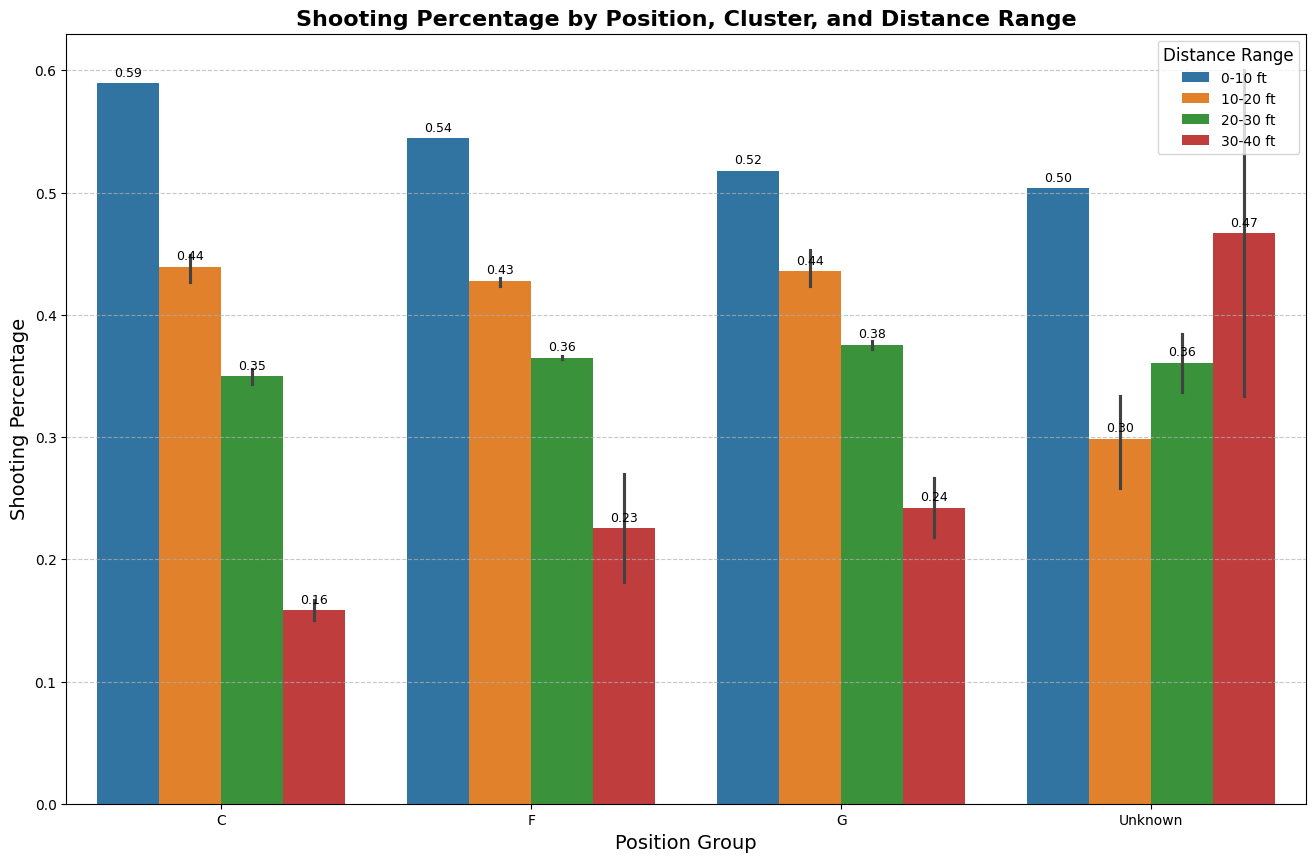

In [ ]:
# Define distance ranges
bins = [0, 10, 20, 30, 40]  # Adjust ranges as needed
labels = ['0-10 ft', '10-20 ft', '20-30 ft', '30-40 ft']
data['DISTANCE_RANGE'] = pd.cut(data['SHOT_DISTANCE'], bins=bins, labels=labels)

# Group data by position, cluster, and distance range
distance_stats = data.groupby(['POSITION_GROUP', 'CLUSTER', 'DISTANCE_RANGE']).agg(
    total_shots=('SHOT_MADE', 'size'),
    made_shots=('SHOT_MADE', 'sum'),
    made_percentage=('SHOT_MADE', 'mean')
).reset_index()

# Rename columns for better readability
distance_stats.rename(columns={'made_percentage': 'made_shot_percentage'}, inplace=True)

# Visualize shooting percentages by position, cluster, and distance
plt.figure(figsize=(16, 10))
sns.barplot(
    data=distance_stats,
    x='POSITION_GROUP',
    y='made_shot_percentage',
    hue='DISTANCE_RANGE',
    palette='tab10'
)

# Add values on top of bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

# Add titles and axis labels
plt.title('Shooting Percentage by Position, Cluster, and Distance Range', fontsize=16, fontweight='bold')
plt.xlabel('Position Group', fontsize=14)
plt.ylabel('Shooting Percentage', fontsize=14)

# Customize the legend
plt.legend(title='Distance Range', title_fontsize=12, fontsize=10, loc='upper right')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
